# Regresion Lineal

primero importamos las librerias que vamos a utilizar, comenzando con las mas pesadas y siguiendo con las auxiliares


In [13]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes_dataset = datasets.load_diabetes()

### Descripcion

In [24]:
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## obtener llaves sin sus valores del diccionario

In [4]:
diabetes_dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

### data 
se refiere a todos los datos 
### target 
se refiere al objetivo
### frame
como es el dataframe
### DESCR
descripcion del dataframe

In [5]:
df = pd.DataFrame(diabetes_dataset['data'],columns=diabetes_dataset['feature_names'])

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Describe para asegurarse que la data este limpía

si al usar el describe la cantidad de columnas es la misma es que no se encuentran valores nulos o no numericos

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


### ahora prepararemos la data para la regresion Lineal

In [8]:
linear_reg = LinearRegression()

**Preparamos los datos prara el entrenamiento y la validacion**

In [9]:
x_data = df.bmi
y_data = pd.DataFrame(diabetes_dataset['target'])

In [10]:
x_data

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

In [11]:
y_data

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [14]:
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data,y_data,test_size=0.2)

In [17]:
len(x_data_train) , len (y_data_train) ,len (x_data_test), len (y_data_test)

(353, 353, 89, 89)

### se envuelve los datos con un reshape para que la data funcione correctamente

In [30]:
x_data_train_shaped = np.array(x_data_train).reshape(-1,1)
y_data_train_shaped = np.array(y_data_train).reshape(-1,1)
x_data_test_shaped = np.array(x_data_test).reshape(-1,1)
y_data_test_shaped = np.array(y_data_test).reshape(-1,1)

In [21]:
x_data_train_shaped

array([[-0.07087468],
       [-0.05147406],
       [ 0.01966154],
       [ 0.04121778],
       [ 0.01966154],
       [-0.05794093],
       [ 0.06061839],
       [ 0.03906215],
       [-0.00620595],
       [ 0.05954058],
       [ 0.04229559],
       [-0.00189471],
       [ 0.01427248],
       [-0.00405033],
       [-0.00512814],
       [-0.03315126],
       [ 0.04445121],
       [ 0.0347509 ],
       [ 0.06708527],
       [-0.03638469],
       [-0.00189471],
       [ 0.02289497],
       [-0.01267283],
       [ 0.03367309],
       [ 0.01750591],
       [-0.01159501],
       [ 0.03690653],
       [-0.0547075 ],
       [-0.02560657],
       [-0.00405033],
       [-0.046085  ],
       [-0.01159501],
       [-0.06225218],
       [ 0.0250506 ],
       [ 0.03906215],
       [-0.07734155],
       [-0.00081689],
       [-0.0547075 ],
       [ 0.07139652],
       [ 0.06169621],
       [-0.06117437],
       [ 0.00457217],
       [-0.05578531],
       [ 0.04121778],
       [-0.04285156],
       [ 0

In [23]:
linear_reg.fit(x_data_train_shaped,y_data_train_shaped)

LinearRegression()

**veamos la ecuacion de la Recta**

In [26]:
print(f'Pendiente: {round((linear_reg.coef_[0][0]),2)}')
print(f'Interseccion con el eje y: {round((linear_reg.intercept_[0]),2)}')
print(f'y = : {round((linear_reg.coef_[0][0]),2)}x + {round((linear_reg.intercept_[0]),2)}')

Pendiente: 927.07
Interseccion con el eje y: 151.03
y = : 927.07x + 151.03


**Ahora con el modelo entrenado procederemos a predecir con los data test y ver su fiabilidad**

In [32]:
y_data_predicted = linear_reg.predict(x_data_test_shaped)

### el y_data_predicted es solo lo que predice nuestro modelo linear_reg
# esta es la calificacion de la prediccion de los datos

In [37]:
print(f'Calificacion de Entrenamiento: {linear_reg.score(x_data_train_shaped,y_data_train_shaped)}')
print(f'Calificacion de Prediccion: {linear_reg.score(x_data_test_shaped,y_data_test_shaped)}')

Calificacion de Entrenamiento: 0.32640973264339945
Calificacion de Prediccion: 0.401129117451939


# ahora graficaremos el modelo

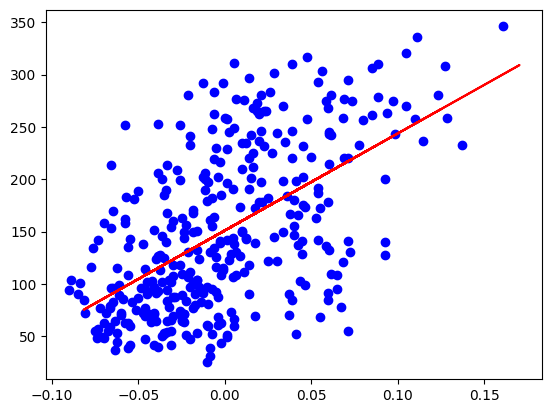

In [41]:
plt.scatter(x_data_train,y_data_train, c='blue')
plt.plot(x_data_test,y_data_predicted, c='red')
plt.show()